# Week 3 - Project 2

### Team 5

#### Goal:
1. Identify a large 2-node network.  Your data should consist of ties between and not within two (or more) distinct groups.
2. Reduce the size of the network using a method (ex. island method)
3. What can you infer about each of the distinct groups?


### 1. Importing our 2-node network
The Facebook-like Forum Network was attained from the Tore Opsahl website: https://toreopsahl.com/datasets/#online_forum_network. The data represents an two-mode network among 899 users and 522 topics, where the connections are weighted on the ties based on the number of messages or characters that a user posted to a topic.

In [107]:
import networkx as net
import csv
import pandas as pd
import requests
import io
import math
import community
import numpy as np
import networkx.algorithms.bipartite as bi
import matplotlib.pyplot as plt
%matplotlib inline

request = requests.get("https://raw.githubusercontent.com/Galanopoulog/DATA620-Project-2/master/p2_data.csv").content
data = pd.read_csv(io.StringIO(request.decode('utf-8')))

In [108]:
data.head()

,user,topic,weight
0,1,1,1
1,1,39,9
2,1,102,2
3,1,154,1
4,1,357,5


In [109]:
len(request)

74919

In [110]:
# Entering data as nodes and edges
fb_csv = csv.reader(open('p2_data.csv'))
users = []
topics = []
fb_g = net.Graph()

for row in fb_csv:
    if row[0] not in users:
        users.append(row[0])
    if row[1] not in topics:
        topics.append(row[1])
    fb_g.add_edge(row[0], row[1], weight = row[2])

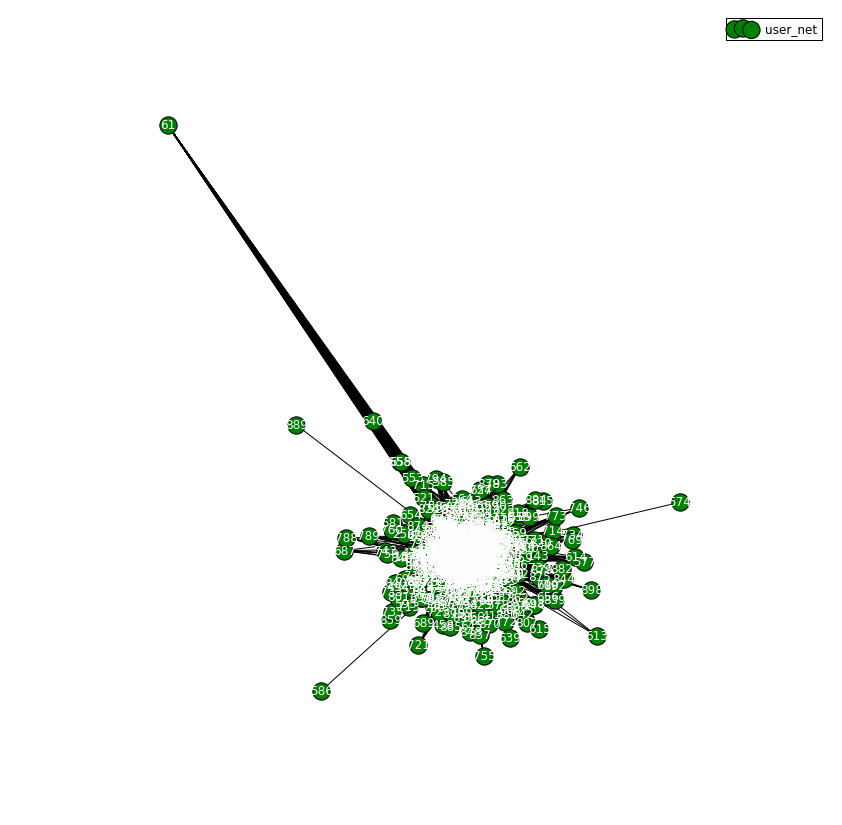

In [111]:
# Subgraph of users
plt.figure(figsize=(11,11))
user_net = bi.weighted_projected_graph(fb_g, users, ratio=False)
user_net = max(net.connected_component_subgraphs(user_net),key=len)
weights = [math.log(edata['weight'])for f,t,edata in user_net.edges(data=True)]

net.draw_spring(topic_net, label = 'user_net', node_color='g', with_labels=True, node_size =300, font_color ='w')
plt.legend(["user_net"])
plt.show()

In [112]:
len(user_net)

899

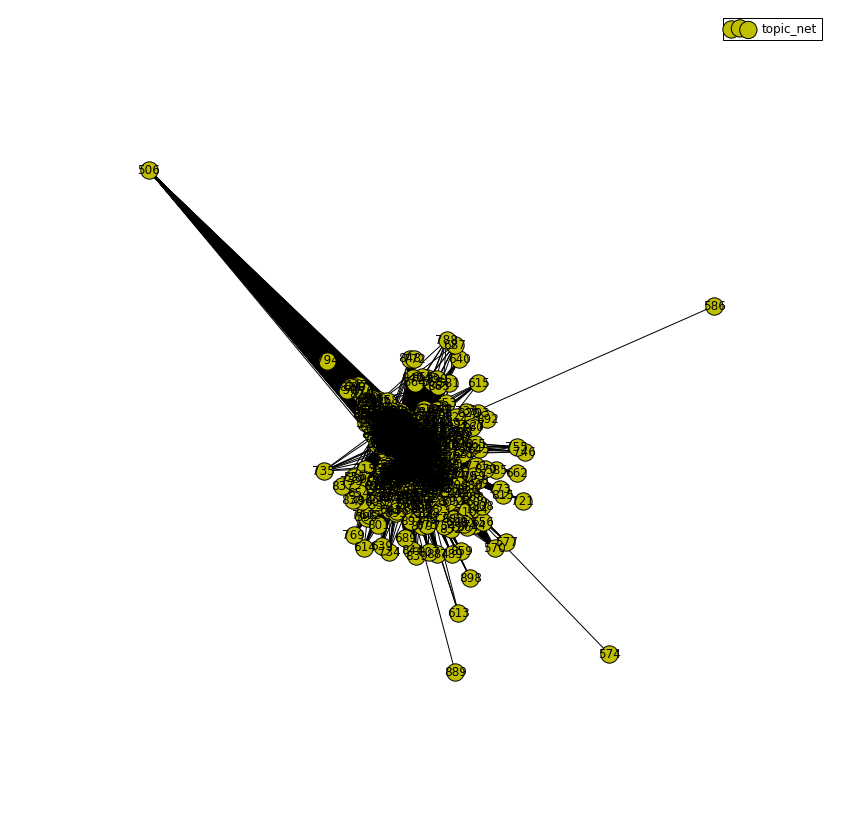

In [113]:
# Subgraph of topics
plt.figure(figsize=(11,11))
topic_net = bi.weighted_projected_graph(fb_g, topics, ratio=False)
topic_net = max(net.connected_component_subgraphs(topic_net),key=len)
weights = [math.log(edata['weight'])for f,t,edata in topic_net.edges(data=True)]

net.draw_spring(topic_net, label = 'topic_net', node_color='y',with_labels=True,node_size =300,font_color ='k')
plt.legend(["topic_net"])
plt.show()

In [114]:
len(topic_net)

899

### 2. Reducing the Network

In [115]:
# Trimming edges based on edge weight
def trim_edges(fb_g, weight=1):
    fb_g2 = net.Graph()
    for f, to, edata in fb_g.edges(data=True):
        if edata['weight']> weight:
            fb_g2.add_edge(f,to,edata)
    return fb_g2

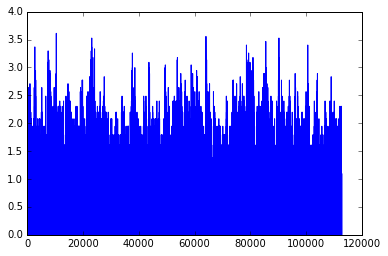

In [116]:
plt.plot(weights)

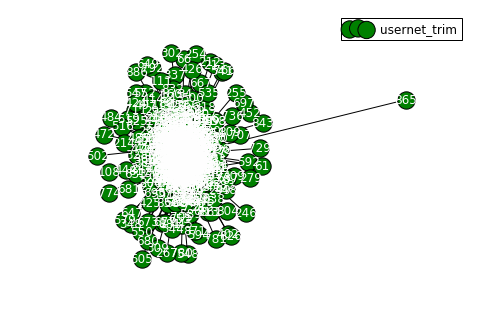

In [117]:
# Trimming the user network
usernet_trim = trim_edges(user_net,weight= math.exp(0.99))
weights = [edata['weight'] for f,t,edata in usernet_trim.edges(data=True)]

net.draw_spring(usernet_trim, label = 'usernet_trim', node_color='g',with_labels=True,node_size =300,font_color ='w')
plt.legend(["usernet_trim"])
plt.show()

In [118]:
len(usernet_trim)

685

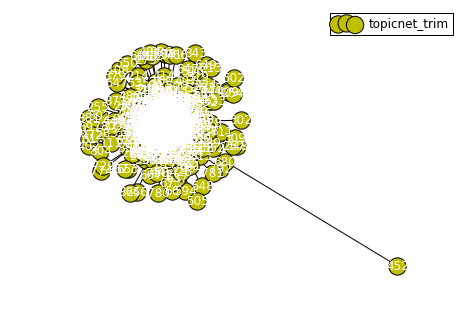

In [119]:
# Trimming the topic network
topicnet_trim = trim_edges(topic_net,weight= math.exp(0.99))
weights = [edata['weight'] for f,t,edata in usernet_trim.edges(data=True)]

net.draw_spring(topicnet_trim, label = 'topicnet_trim', node_color='y',with_labels=True,node_size =300,font_color ='w')
plt.legend(["topicnet_trim"])
plt.show()

In [120]:
len(topicnet_trim)

684

In [121]:
## Raising the water level based on min and max values
weights= [edata['weight'] for f,to,edata in usernet_trim.edges(data=True)]
mn = int(min(weights))
mx = int(max(weights))

In [122]:
# Island method for user network
def island_method(usernet_trim, iterations=10):
    step =((mx - mn)/iterations)
    return [[threshold, trim_edges(usernet_trim, threshold)] for threshold in np.arange(mn,mx,step)]

In [123]:
cc = list(net.connected_component_subgraphs(usernet_trim))
# Removing nodes with no edges
ccn=[]
j=0
for i in range(len(cc)):
    if (len(net.edges(cc[i]))!=0):
        ccn.insert(j,cc[i])
        j=j+1
len(ccn)

1

In [124]:
for i in range(len(ccn)) :
    islands = island_method(ccn[i])
    if islands is not None:
        for j in range(len(islands)):
            print ('Subgraph:',i, 'Weight :', islands[j][0] , '# Nodes:', len(net.nodes(islands[j][1])))

('Subgraph:', 0, 'Weight :', 3, '# Nodes:', 585)
('Subgraph:', 0, 'Weight :', 6, '# Nodes:', 347)
('Subgraph:', 0, 'Weight :', 9, '# Nodes:', 187)
('Subgraph:', 0, 'Weight :', 12, '# Nodes:', 112)
('Subgraph:', 0, 'Weight :', 15, '# Nodes:', 66)
('Subgraph:', 0, 'Weight :', 18, '# Nodes:', 37)
('Subgraph:', 0, 'Weight :', 21, '# Nodes:', 27)
('Subgraph:', 0, 'Weight :', 24, '# Nodes:', 18)
('Subgraph:', 0, 'Weight :', 27, '# Nodes:', 14)
('Subgraph:', 0, 'Weight :', 30, '# Nodes:', 8)
('Subgraph:', 0, 'Weight :', 33, '# Nodes:', 8)
('Subgraph:', 0, 'Weight :', 36, '# Nodes:', 2)


In [125]:
# Island method for topic network
def island_method(topicnet_trim, iterations=10):
    step =((mx - mn)/iterations)
    return [[threshold, trim_edges(topicnet_trim, threshold)] for threshold in np.arange(mn,mx,step)]

In [126]:
cc = list(net.connected_component_subgraphs(topicnet_trim))
# Removing nodes with no edges
ccn=[]
j=0
for i in range(len(cc)):
    if (len(net.edges(cc[i]))!=0):
        ccn.insert(j,cc[i])
        j=j+1
len(ccn)

1

In [127]:
for i in range(len(ccn)) :
    islands = island_method(ccn[i])
    if islands is not None:
        for j in range(len(islands)):
            print ('Subgraph:',i, 'Weight :', islands[j][0] , '# Nodes:', len(net.nodes(islands[j][1])))

('Subgraph:', 0, 'Weight :', 3, '# Nodes:', 581)
('Subgraph:', 0, 'Weight :', 6, '# Nodes:', 342)
('Subgraph:', 0, 'Weight :', 9, '# Nodes:', 186)
('Subgraph:', 0, 'Weight :', 12, '# Nodes:', 109)
('Subgraph:', 0, 'Weight :', 15, '# Nodes:', 64)
('Subgraph:', 0, 'Weight :', 18, '# Nodes:', 35)
('Subgraph:', 0, 'Weight :', 21, '# Nodes:', 27)
('Subgraph:', 0, 'Weight :', 24, '# Nodes:', 18)
('Subgraph:', 0, 'Weight :', 27, '# Nodes:', 14)
('Subgraph:', 0, 'Weight :', 30, '# Nodes:', 8)
('Subgraph:', 0, 'Weight :', 33, '# Nodes:', 8)
('Subgraph:', 0, 'Weight :', 36, '# Nodes:', 2)


We have one subraph for each network, so centrality measures may be better at identifying network dynamics.

### 3. Inferences About Groups

In [128]:
# Function defined sorted_map for sorting books based on their centrality value
def sorted_map(map):
    ms= sorted(map.iteritems(),key=lambda(k,v):(-v,k))
    return ms

In [129]:
# Is the users graph directed?
user_ud = usernet_trim.to_undirected()
fb_components = net.connected_component_subgraphs(user_ud)
net.is_directed(user_ud)

False

In [130]:
# Is the topics graph directed?
topic_ud = topicnet_trim.to_undirected()
fb_components = net.connected_component_subgraphs(topic_ud)
net.is_directed(topic_ud)

False

In [131]:
#Find Communities for users
part = community.best_partition(user_ud)
mod = community.modularity(part, user_ud)

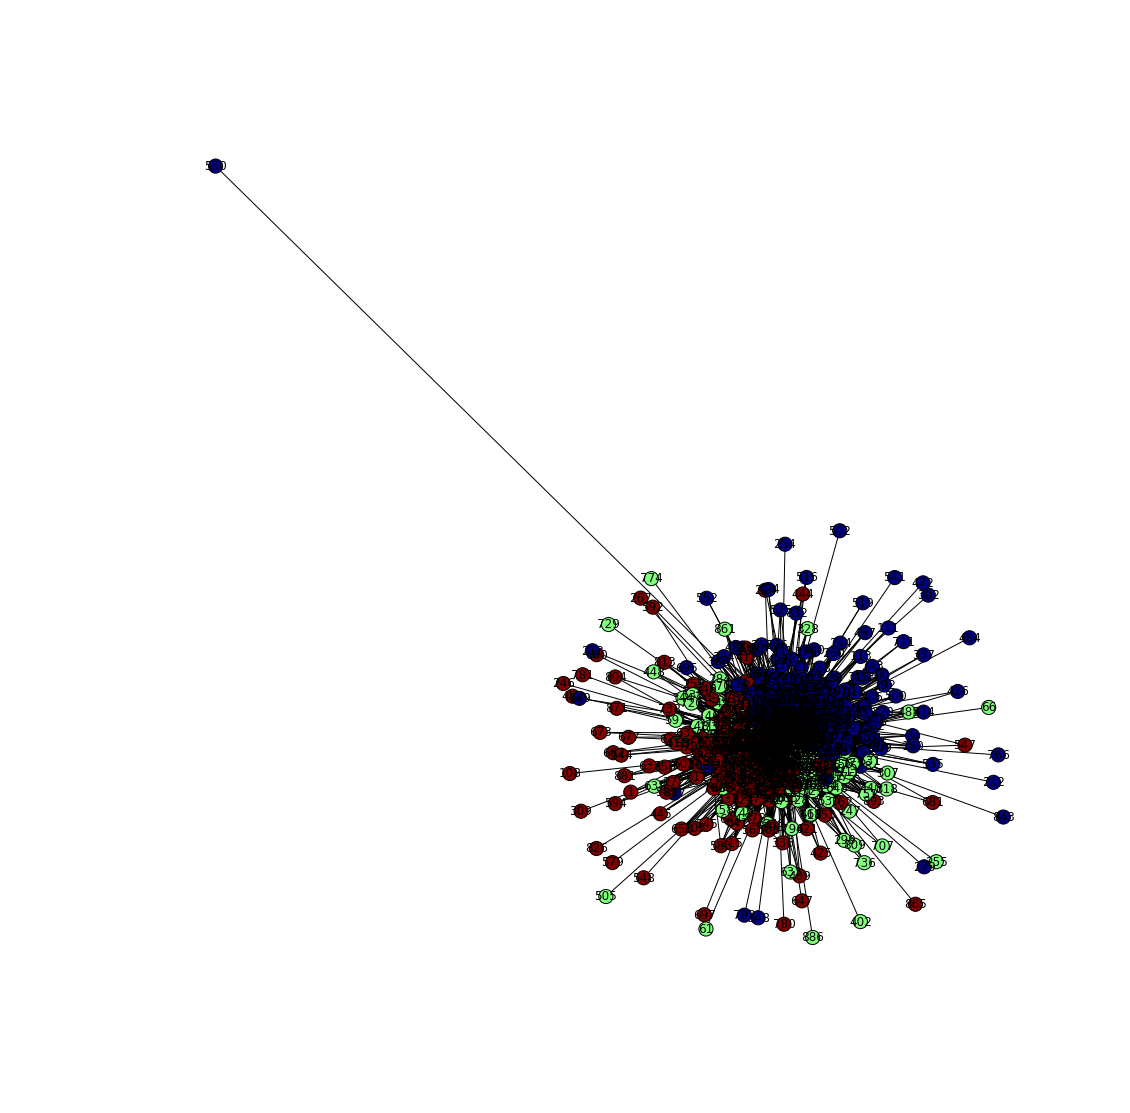

In [132]:
values = [part.get(node) for node in user_ud.nodes()]
plt.figure(figsize=(15,15))
pos = net.drawing.spring_layout(user_ud)
net.draw(user_ud, pos, cmap=plt.get_cmap('jet'), node_color = values, node_size=200, with_labels=True)

In [133]:
#Find Communities for topics
part1 = community.best_partition(topic_ud)
mod1 = community.modularity(part1, topic_ud)

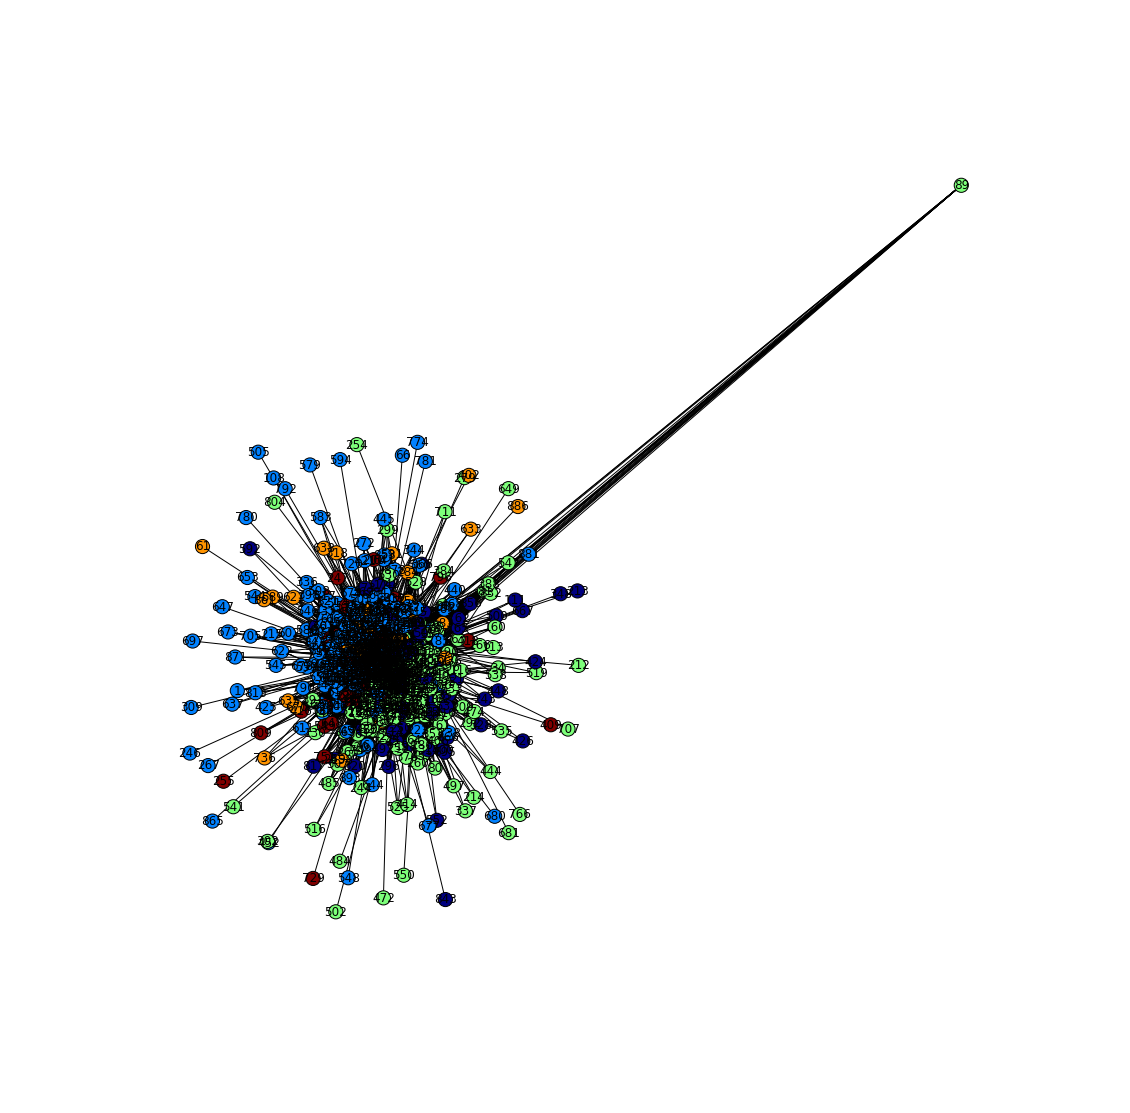

In [134]:
values = [part1.get(node) for node in topic_ud.nodes()]
plt.figure(figsize=(15,15))
pos = net.drawing.spring_layout(topic_ud)
net.draw(topic_ud, pos, cmap=plt.get_cmap('jet'), node_color = values, node_size=200, with_labels=True)

#### Users

In [135]:
# Examine node data to determine top user centralities
print user_ud.nodes(data=True)[0:5]

[('198', {}), ('344', {}), ('819', {}), ('346', {}), ('347', {})]


In [136]:
# Compute Degree Measure
d = net.degree(usernet_trim)
ds = sorted_map(d)

In [150]:
user_ud = fb_g
# Degree Centrality
dcent = net.degree_centrality(user_ud)
dcent_s = sorted_map(dcent)

In [151]:
# Closeness Centrality
ccent = net.closeness_centrality(user_ud)
ccent_s = sorted_map(ccent)

In [152]:
# Betweenness Centrality
bcent = net.betweenness_centrality(user_ud)
bcent_s = sorted_map(bcent)

In [153]:
# Top 0 nodes for each Centrality
TopD = [item[0] for item in dcent_s[0:19]]
TopB = [item[0] for item in bcent_s[0:19]]
TopC = [item[0] for item in ccent_s[0:19]]
TopNodes = TopD + TopB + TopC

In [154]:
from prettytable import PrettyTable


names1=[x[0] for x in dcent_s[:19]]
names2=[x[0] for x in ccent_s[:19]]
names3=[x[0] for x in bcent_s[:19]]
names=list(set(names1)|set(names2)|set(names3))

table=[[name,user_ud.degree(name),round(dcent[name],3),round(ccent[name],3),round(bcent[name],3)] for name in names]


table=sorted(table,key=lambda x: -x[4])
pt = PrettyTable(['Node','Degree','Degree Cent.','Closeness Cent.','Betweenness Cent.'])
for i in range(0, len(table)):
    pt.add_row(table[i])
    
print pt

+------+--------+--------------+-----------------+-------------------+
| Node | Degree | Degree Cent. | Closeness Cent. | Betweenness Cent. |
+------+--------+--------------+-----------------+-------------------+
|  10  |  128   |    0.143     |      0.474      |       0.049       |
|  13  |  122   |    0.136     |      0.484      |       0.044       |
|  67  |  113   |    0.126     |      0.484      |       0.041       |
|  59  |   87   |    0.097     |      0.456      |       0.038       |
|  82  |  102   |    0.114     |      0.474      |       0.034       |
|  75  |   96   |    0.107     |       0.46      |       0.032       |
| 164  |  102   |    0.114     |      0.467      |        0.03       |
|  12  |   95   |    0.106     |      0.468      |        0.03       |
| 100  |  100   |    0.111     |      0.483      |       0.028       |
|  18  |   92   |    0.102     |       0.47      |       0.026       |
| 208  |   79   |    0.088     |      0.444      |       0.023       |
|  91 

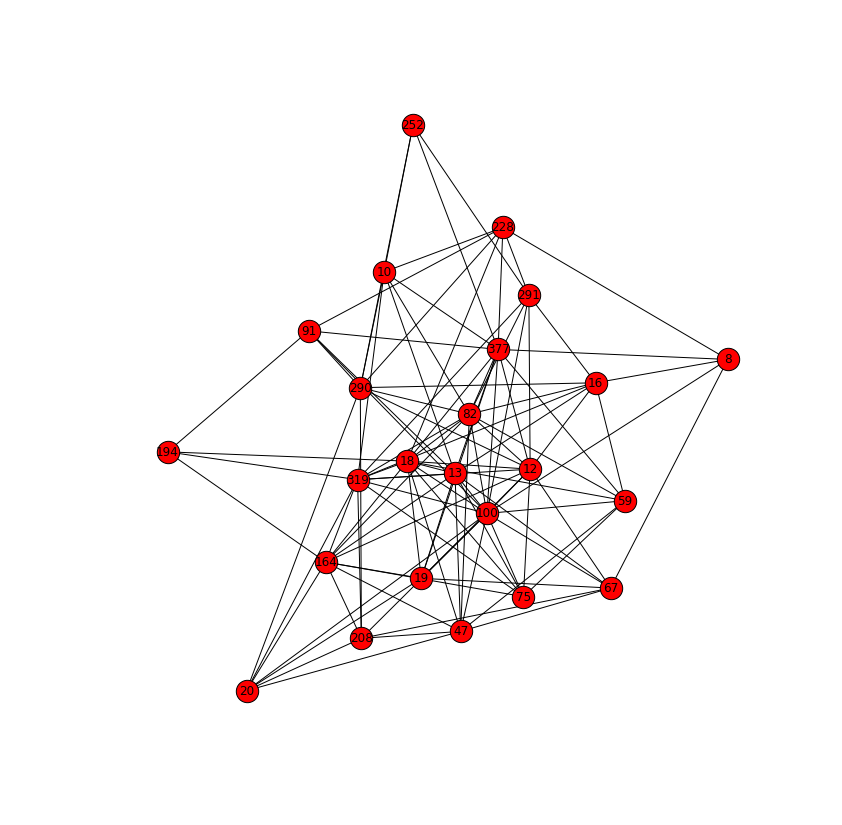

In [155]:
# Subgraph of Most Central Individuals
plt.figure(figsize=(11,11))
G = net.Graph(user_ud)

nodes = G.nodes()
edges = G.edges()

H = net.path_graph(903)
H.add_nodes_from(G)
H.add_edges_from(G.edges())

H2 = H.subgraph(TopNodes)
centralcenter = net.center(H2)
       
net.draw(H2, with_labels=True, node_color = "r", node_size = 500)

#### Topics

In [143]:
# Examine node data to determine top user centralities
print topic_ud.nodes(data=True)[0:5]

[('198', {}), ('344', {}), ('819', {}), ('346', {}), ('347', {})]


In [144]:
# Compute Degree Measure
td = net.degree(topicnet_trim)
tds = sorted_map(td)

In [145]:
# Degree Centrality
tdcent = net.degree_centrality(topic_ud)
tdcent_s = sorted_map(tdcent)

In [146]:
# Closeness Centrality
tccent = net.closeness_centrality(topic_ud)
tccent_s = sorted_map(tccent)

In [147]:
# Betweenness Centrality
tbcent = net.betweenness_centrality(topic_ud)
tbcent_s = sorted_map(tbcent)

In [148]:
# Top 0 nodes for each Centrality
ToptD = [item[0] for item in tdcent_s[0:19]]
ToptB = [item[0] for item in tbcent_s[0:19]]
ToptC = [item[0] for item in tccent_s[0:19]]
ToptNodes = ToptD + ToptB + ToptC

In [149]:
from prettytable import PrettyTable


names1=[x[0] for x in tdcent_s[:19]]
names2=[x[0] for x in tccent_s[:19]]
names3=[x[0] for x in tbcent_s[:19]]
names=list(set(names1)|set(names2)|set(names3))

table=[[name,topic_ud.degree(name),round(tdcent[name],3),round(tccent[name],3),round(tbcent[name],3)] for name in names]


table=sorted(table,key=lambda x: -x[4])
pt = PrettyTable(['Node','Degree','Degree Cent.','Closeness Cent.','Betweenness Cent.'])
for i in range(0, len(table)):
    pt.add_row(table[i])
    
print pt

+------+--------+--------------+-----------------+-------------------+
| Node | Degree | Degree Cent. | Closeness Cent. | Betweenness Cent. |
+------+--------+--------------+-----------------+-------------------+
| 100  |  458   |    0.671     |      0.751      |       0.063       |
|  67  |  425   |    0.622     |      0.724      |       0.053       |
|  13  |  430   |     0.63     |      0.729      |       0.052       |
|  82  |  392   |    0.574     |      0.701      |       0.042       |
| 164  |  403   |     0.59     |      0.709      |       0.039       |
|  18  |  407   |    0.596     |      0.711      |        0.03       |
|  10  |  344   |    0.504     |      0.666      |       0.025       |
|  12  |  379   |    0.555     |      0.692      |       0.023       |
| 290  |  331   |    0.485     |      0.657      |       0.021       |
| 377  |  337   |    0.493     |      0.662      |        0.02       |
|  47  |  340   |    0.498     |      0.663      |       0.018       |
| 319 

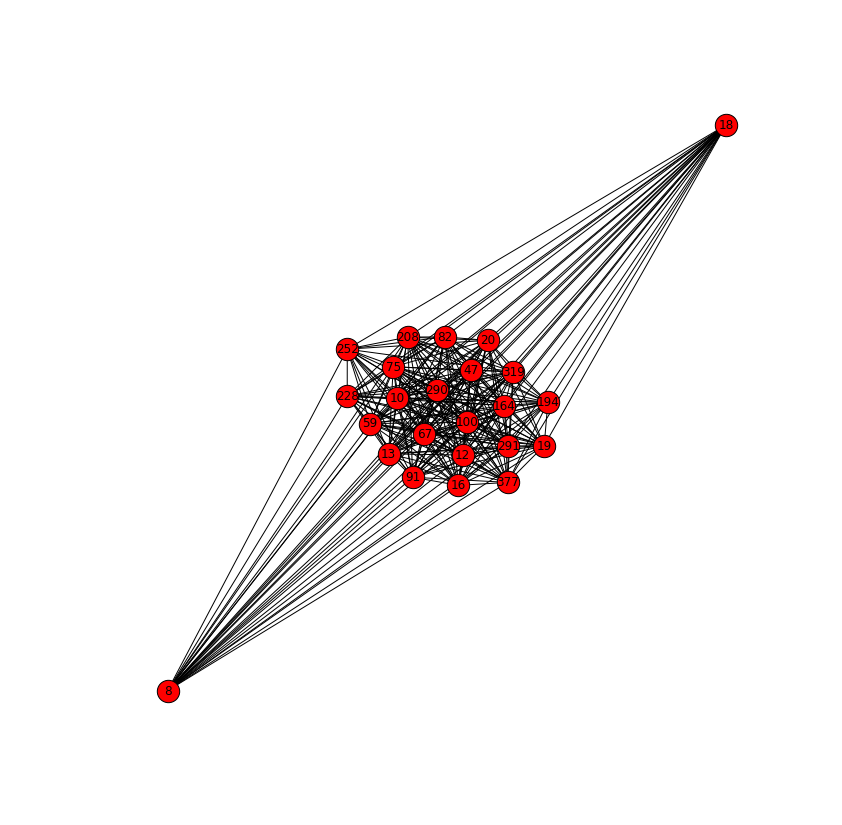

In [156]:
# Subgraph of Most Central Topics
plt.figure(figsize=(11,11))
G = net.Graph(topic_ud)

nodes = G.nodes()
edges = G.edges()

H = net.path_graph(903)
H.add_nodes_from(G)
H.add_edges_from(G.edges())

H2 = H.subgraph(TopNodes)
centralcenter = net.center(H2)
       
net.draw(H2, with_labels=True, node_color = "r", node_size = 500)

#### Conclusion:
It is unclear if it is due to the nature of the data or the approach to the network that the island method did not produce the expected results. After trimming the data, each network was determined to fit together as one island. As such, in order to determine the central nodes in each network, centrality measures were calculated and the relationship between them was plotted above. It is interesting to note, though, that despite each network being categorized as having one island, both users and topics seemed to have distinct communities, which may imply that despite their diversity, the nodes overall were equally well-connected among themselves.